## Легенда
Компания Pens and Pencils базируется в США и там же осуществляет свою деятельность. С марта 2017 года её профиль — B2B и B2C-продажи офисных товаров (оргтехника, канцтовары и мебель) онлайн. 

## ЗАДАЧА
Необходимо проанализировать эффективность работы компании с точки зрения эффективности и дать рекомендации по масштабированию бизнеса, а именно в каком штате лучше открыть второй офлайн магазин(первый находится в штате Техас).

## КОНКРЕТНЫЕ ШАГИ
1. Оценить динамику продаж и распределение выручки по товарам.  
2. Выяснить какие клиенты приносят больше выручки. 
3. Определить, все ли заказы доставляются в срок и какова средняя длительность доставки заказа по классу доставки.  
4. Найти подходящий штат для откытия второго магазина.  


## Описание данных  
### Таблица store_customers - Представляет собой справочник клиентов  

cust_id	- id клиента, первичный ключ таблицы;  
cust_nm	- имя клиента;  
category - тип клиента; значения: 'Consumer' (B2C-клиент, розничный покупатель), 'Corporate' (B2B-клиент, компания).  



### Таблица store_products - Представляет собой справочник товаров  

product_id - id товара; первичный ключ таблицы;  
category - категория товара;  
subcategory - подкатегория товара;  
product_nm - название, свойства: цвет, модель, бренд и т. д.  
price - цена товара.  



### Таблица store_carts - Представляет собой таблицу со списком товаров в заказе, их количеством, а также скидкой для каждого товара

id - id записи в таблице;  
order_id - id заказа; внешний ключ к таблице store_delivery;  
product_id - id товара; внешний ключ к таблице store_products;  
quantity - количество единиц отдельного товара в заказе;  
discount - доля скидки на определённый товар; значение 0.1 означает скидку в 10%.  



### Таблица store_delivery - Хранит информацию о заказах и их доставке

order_id - id заказа, первичный ключ таблицы;  
order_date - дата заказа;  
ship_date - фактическая дата доставки;  
ship_mode - тип доставки;  
state - штат доставки;  
city - город доставки;  
zip_code - индекс доставки;  
cust_id - id клиента; внешний ключ к таблице store_customers.

Примечание к столбцу ship_mode:  
Standard Class - Стандартная доставка - Доставка в течение шести дней  
Second Class - Доставка вторым классом - Доставка в течение четырёх дней  
First Class - Доставка первым классом - Доставка в течение трёх дней  
Same Day - Экспресс-доставка - Экспресс-доставка в тот же день  




## Примечание
В ноутбуке в основном производится предобработка данных. Дашборд со всеми показателями представлен в Power BI (ссылка), а выводы в отдельном документе (ссылка?)  

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
carts = pd.read_csv('store_carts.csv')
customers = pd.read_csv('store_customers.csv')
delivery = pd.read_csv('store_delivery.csv')
products = pd.read_csv('store_products.csv')

display(carts.head())
display(customers.head())
display(delivery.head())
display(products.head())

,id,order_id,product_id,quantity,discount
0,1,CA-2014-100006,TEC-PH-10002075,3,0.0
1,2,CA-2014-100090,OFF-BI-10001597,6,0.2
2,3,CA-2014-100090,FUR-TA-10003715,3,0.2
3,4,CA-2014-100293,OFF-PA-10000176,6,0.2
4,5,CA-2014-100328,OFF-BI-10000343,1,0.2


,cust_id,cust_nm,category
0,EB-13840,Ellis Ballard,Corporate
1,JR-16210,Justin Ritter,Corporate
2,KD-16495,Keith Dawkins,Corporate
3,HW-14935,Helen Wasserman,Corporate
4,AC-10420,Alyssa Crouse,Corporate


,order_id,order_date,ship_date,ship_mode,state,city,zip_code,cust_id
0,US-2014-144078,2017-11-25,2017-11-29,Standard Class,California,Los Angeles,90004,RB-19435
1,CA-2017-161823,2020-09-03,2020-09-08,Standard Class,California,San Francisco,94122,AG-10300
2,CA-2014-160773,2017-07-01,2017-07-05,Standard Class,Florida,Deltona,32725,LW-16825
3,US-2014-134054,2017-10-10,2017-10-10,Same Day,New Mexico,Albuquerque,87105,FC-14335
4,CA-2014-142965,2017-07-20,2017-07-20,Same Day,Ohio,Springfield,45503,SW-20245


,product_id,category,subcategory,product_nm,price
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",91.69
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",102.83
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,119.69
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,14.57
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",70.98


## Задача №1 и №2

In [196]:
#Для удобства визуализации, для каждой задачи, создаётся отдельный датасет из данных
df_revenue = delivery.merge(
    carts,
    on='order_id',
    how='left'
)

df_revenue = df_revenue.merge(
    products,
    on='product_id',
    how='left'
)

df_revenue = df_revenue.merge(
    customers,
    on='cust_id',
    how='left'
)

#Оставляем только нужное
df_revenue = df_revenue[['order_id', 'order_date', 'ship_date', 'quantity', 'discount',\
    'category_x', 'subcategory', 'product_nm', 'price', 'cust_nm', 'category_y']]

#Считаем выручку с учётом скидок
df_revenue['revenue'] = (df_revenue['price'] - (df_revenue['price'] * df_revenue['discount'])) * df_revenue['quantity']

display(df_revenue)


,order_id,order_date,ship_date,quantity,discount,category_x,subcategory,product_nm,price,cust_nm,category_y,revenue
0,US-2014-144078,2017-11-25,2017-11-29,4,0.2,Furniture,Chairs,Hon GuestStacker Chair,181.34,Richard Bierner,Corporate,580.288
1,US-2014-144078,2017-11-25,2017-11-29,3,0.0,Office Supplies,Art,Staples in misc. colors,2.48,Richard Bierner,Corporate,7.440
2,US-2014-144078,2017-11-25,2017-11-29,5,0.2,Technology,Phones,Logitech Mobile Speakerphone P710e - speaker p...,107.98,Richard Bierner,Corporate,431.920
3,CA-2017-161823,2020-09-03,2020-09-08,2,0.0,Office Supplies,Art,"Premium Writing Pencils, Soft, #2 by Central A...",2.38,Aleksandra Gannaway,Corporate,4.760
4,CA-2014-160773,2017-07-01,2017-07-05,6,0.7,Office Supplies,Binders,Avery Durable Binders,0.58,Laurel Workman,Corporate,1.044
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2016-152170,2019-11-12,2019-11-15,2,0.0,Office Supplies,Paper,Xerox 1896,9.99,Frank Hawley,Corporate,19.980
9990,CA-2016-152170,2019-11-12,2019-11-15,2,0.0,Office Supplies,Binders,Cardinal Slant-D Ring Binders,2.61,Frank Hawley,Corporate,5.220
9991,CA-2015-153423,2018-06-22,2018-06-27,2,0.2,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,152.20,Shaun Weien,Corporate,243.520
9992,CA-2014-135608,2017-12-08,2017-12-10,5,0.2,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,105.69,Jim Karlsson,Corporate,422.760


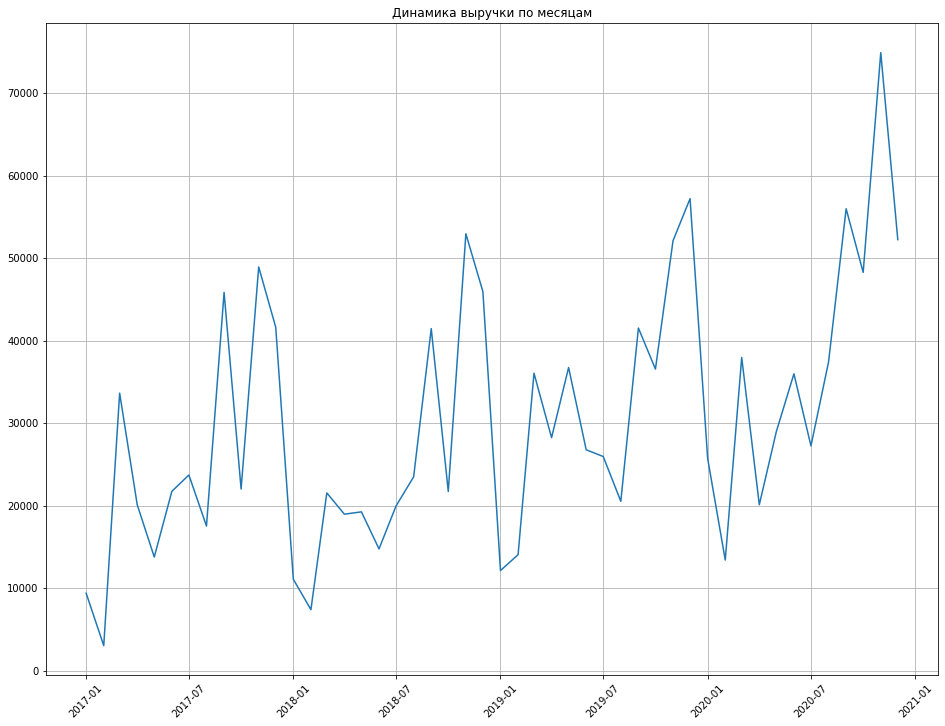

In [197]:
#Непосредственно задача

#динамика выручки
df_revenue['order_date'] = pd.to_datetime(df_revenue['order_date'])
df_revenue['month_year'] = df_revenue['order_date'].dt.to_period('M')

revenue_dyinamycs = df_revenue.groupby('month_year', as_index=False)['revenue'].sum()
revenue_dyinamycs['month_year'] = revenue_dyinamycs['month_year'].astype(str)
revenue_dyinamycs['month_year'] = pd.to_datetime(revenue_dyinamycs['month_year'])

#Визуализация
plt.figure(figsize=(16,12))
plt.plot(revenue_dyinamycs['month_year'], revenue_dyinamycs['revenue'])
plt.title('Динамика выручки по месяцам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [198]:
#Распределение выручки по категориям товаров
category = df_revenue.groupby('category_x', as_index=False)['revenue'].sum()
display(category)

#Распределение выручки по СУБкатегориям
subcategory = df_revenue.groupby('subcategory', as_index=False)['revenue'].sum()
display(subcategory)


,category_x,revenue
0,Furniture,460817.2741
1,Office Supplies,428964.2360
2,Technology,556375.2050


,subcategory,revenue
0,Accessories,125442.4800
1,Appliances,55550.1450
2,Art,22147.8940
3,Binders,45311.5010
4,Bookcases,59271.4501
5,Chairs,235318.4460
6,Copiers,95844.0300
7,Envelopes,13809.2640
8,Fasteners,2458.6620
9,Furnishings,51694.9140


Более детальная визуализация представлена в отчёте Power BI (ссылка)

## Задача 2

In [199]:
#Какие клиенты приносят больше выручки
client_type = df_revenue.groupby('category_y', as_index=False)['revenue'].sum()
display(client_type)

,category_y,revenue
0,Consumer,2.741476e+05
1,Corporate,1.172009e+06


Более детальная визуализация и выводы представлены в отчёте Power BI (ссылка)

## Задача 3


In [200]:
#Для этой задачи понадобится две таблицы: delivery и customers

df3 = delivery.merge(
    customers,
    on='cust_id',
    how='left'
)

df3['ship_date'] = pd.to_datetime(df3['ship_date'])
df3['order_date'] = pd.to_datetime(df3['order_date'])


#Время доставки по каждому заказу
df3['time_of_delivery'] = df3['ship_date'] - df3['order_date']
#Перевод в числовое значение
df3['time_of_delivery'] = df3['time_of_delivery'].dt.days

#Проверка на отсутствие значений меньше нуля
#df3['time_of_delivery'].min()

#Столбец с месяцем и годом
df3['month_year'] = df3['order_date'].dt.to_period('M')

#Столбец с максимальным временем доставки

def max_time(row):
    if row == 'Standard Class':
        return 6
    if row == 'Second Class':
        return 4
    if row == 'First Class':
        return 3    
    if row == 'Same Day':
        return 0
    
#Столбец с максимальным временем доставки    
df3['max_time_delivery'] = df3['ship_mode'].apply(lambda x: max_time(x))

#Столбец со значением опоздал\вовремя
df3['delivery_diffrenece'] = df3['max_time_delivery'] - df3['time_of_delivery']

#Функция для определения своевременности доставки
def on_time(row):
    if row < 0:
        return 0
    else:
        return 1

df3['delivery_in_time'] = df3['delivery_diffrenece'].apply(lambda x: on_time(x))

#Датасет с информацией о среднем времени доставки и долей опозданий
df_time_delifery = df3.groupby('ship_mode').agg({'order_id': 'count', 'delivery_in_time': 'sum', 'time_of_delivery': 'mean'}).reset_index()
df_time_delifery['share_of_tardiness'] = round((1 - (df_time_delifery['delivery_in_time'] / df_time_delifery['order_id'])) * 100, 3)

#переименуем
df_time_delifery = df_time_delifery.rename(columns={'order_id': 'Количество заказов', 'delivery_in_time': 'Доставленно вовремя',\
    'time_of_delivery': 'Среднее время доставки', 'share_of_tardiness': 'Доля опозданий в процентах'})

display(df_time_delifery)

#Более подробно(по дате, штату, городу) в отчёте Power BI




,ship_mode,Количество заказов,Доставленно вовремя,Среднее время доставки,Доля опозданий в процентах
0,First Class,787,786,2.186785,0.127
1,Same Day,264,252,0.045455,4.545
2,Second Class,964,762,3.231328,20.954
3,Standard Class,2994,2685,5.002672,10.321


## Задача №4

In [201]:
#Добавим данные в df3, о сумме доставки

df4 = carts.merge(
    products[['product_id','price']],
    on='product_id',
    how='left'
)

#Считаем price с учётом количества и скидок
df4['revenue'] = df4['price'] * (1 - df4['discount']) * df4['quantity']

#Добавляем к df3

df3 = df3.merge(
    df4,
    on='order_id',
    how='left'
)

#Группировка для ответа на 4 задачу
states_df = df3.groupby('state').agg({'order_id': 'count', 'revenue': 'sum'}).reset_index()
states_df = states_df.sort_values(by='revenue', ascending=False)

display(states_df.head())





,state,order_id,revenue
3,California,2001,292430.0355
30,New York,1128,201702.8620
41,Texas,985,105377.3956
45,Washington,506,82826.7220
36,Pennsylvania,587,71776.2330
